In [7]:
import os
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt


In [42]:
def find_fwhm(smooth_signal, min_peak_prom = 0.25):
    smooth_peaks, _ = sig.find_peaks(smooth_signal, prominence=(np.max(smooth_signal)-np.min(smooth_signal))*min_peak_prom)
    proms, _, _ = sig.peak_prominences(smooth_signal, smooth_peaks)
    widths, heights, leftIndex, rightIndex = sig.peak_widths(smooth_signal, smooth_peaks, rel_height=0.5)
    return(proms, widths, heights, leftIndex, rightIndex)

[2414.04343891  709.05429864]
[16.58017823 10.27781293]
[1694.81900452  709.83755656]


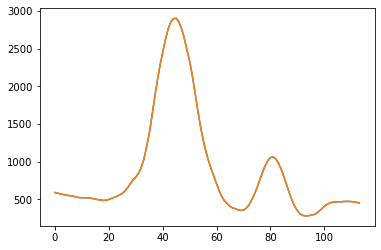

In [48]:
trace_path = '/Users/bementmbp/Desktop/double_peak.rtf'

minPeakProm = 0.25
trace = np.loadtxt(trace_path)
raw = trace[:,1]
smoothed = sig.savgol_filter(raw, window_length=15, polyorder=2)

proms, widths, heights, leftIndex, rightIndex = find_fwhm(smoothed)

print(proms)
print(widths)
print(heights)


'''
for index, peak in enumerate(smoothPeaks):
    ax.hlines(heights[index], leftIndex[index], rightIndex[index])
'''
fwhm = np.max(widths)

fig, ax = plt.subplots()
ax.plot(raw)
ax.plot(smoothed)
plt.show()
